# Week 2 - Luis Aldeco:

My goal by the end of this week is to invest the rest of my money (~$32,000) on three other stocks, so that by the following week I can analyze which I should sell.  
The Stocks That I invested in last week did very well in general, except for Microsoft. I will have to see if that downward trend is indicative of a greater trend, but I doubt it.  
I will use the same pool of stocks as I did last time, but this time I will analyze the data using other metrics. I will then compare both weeks to see which is more accurate. The metrics I will be using this time are Earnings per Share, Beta Values, and P/E ratio.

In [1]:
# Installing required packages

!pip install datapackage
!pip install pandas
!pip install numpy
!pip install yahoo-finance
!pip install matplotlib
!pip install yahoo_fin
!pip install requests_html
!pip install html5lib

     |████████████████████████████████| 112 kB 4.7 MB/s eta 0:00:01


In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
%matplotlib inline
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

First I want to get a sense of how the previous stocks faired last week.

In [15]:
start = "2021-11-10"
end = '2021-11-25'
#Non-Invesments
Intel = yf.download('INTC',start,end)
BankOfAmerica = yf.download('BAC',start,end)
Target = yf.download('TGT',start,end)
HP = yf.download('HPE',start,end)
IBM = yf.download('IBM',start,end)
HASBRO = yf.download('HAS',start,end)
Merck = yf.download('MRK',start,end)
AbbVie = yf.download('ABBV',start,end)
Progressive = yf.download('PGR',start,end)
Nationwide = yf.download('NFS',start,end)
AmericanExpress = yf.download('AXP',start,end)
USAA = yf.download('USISX',start,end)
CapitalOne = yf.download('COF',start,end)

#Week 1 Investments
Microsoft = yf.download('MSFT',start,end) 
Cisco = yf.download('CSCO',start,end)
Anthem = yf.download('ANTM',start,end)
Comcast = yf.download('CMCSA',start,end)

#Creating Tickers for the companies
ticker_list = ["msft","intc","bac","tgt","hpe","ibm","has","mrk","abbv","pgr","nfs", "axp","usisx", "cof", "csco", 'antm', 'cmcsa']
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = get_data(ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Let's see how the companies fare dover the past two weeks.  
To make the data more legible, I split it up into 4 seperate plots.

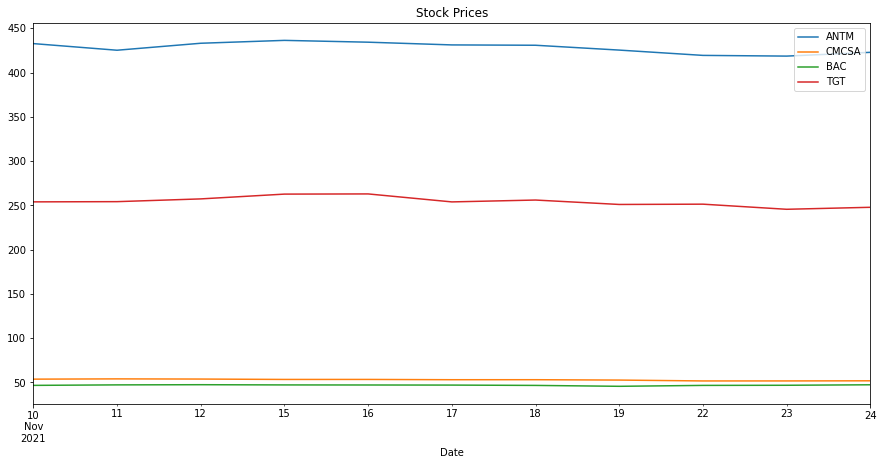

In [4]:
# Plot 1
Anthem['Open'].plot(label = 'ANTM', figsize = (15,7))
Comcast['Open'].plot(label = "CMCSA")
BankOfAmerica['Open'].plot(label = 'BAC')
Target['Open'].plot(label = "TGT")

plt.title('Stock Prices')
plt.legend()

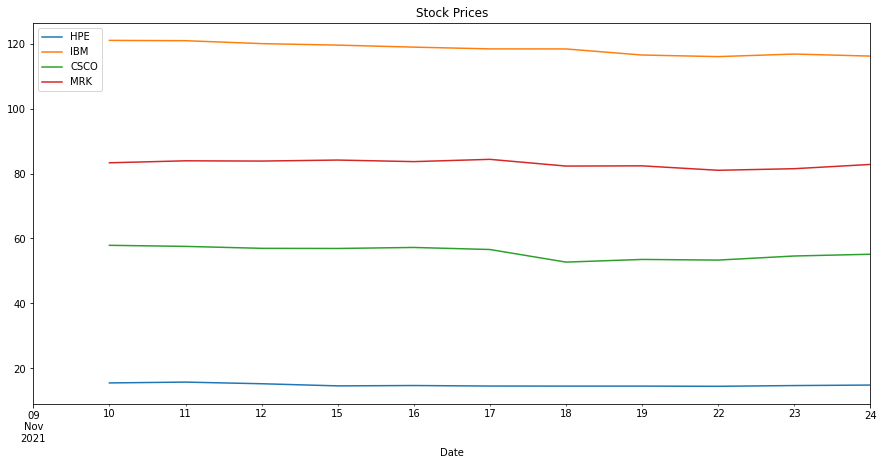

In [5]:
# Plot 2
HP['Open'].plot(label = 'HPE', figsize = (15,7))
IBM['Open'].plot(label = "IBM")
Cisco['Open'].plot(label = 'CSCO')
Merck['Open'].plot(label = "MRK")

plt.title('Stock Prices')
plt.legend()

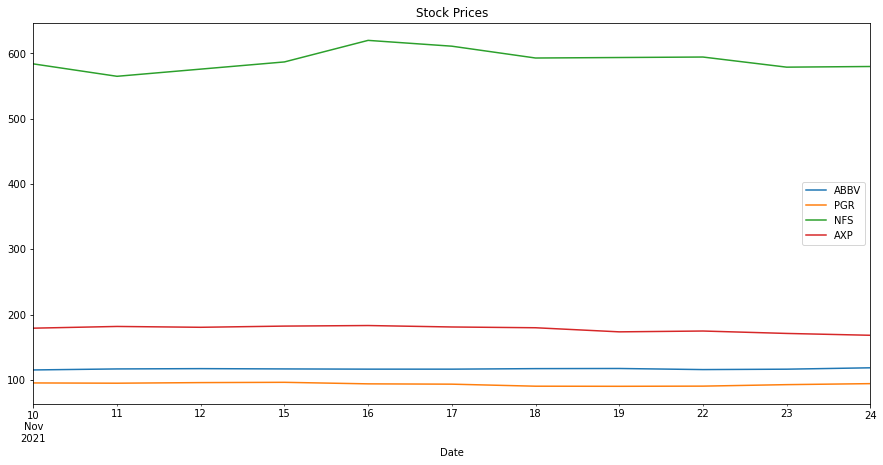

In [6]:
# Plot 3
AbbVie['Open'].plot(label = 'ABBV', figsize = (15,7))
Progressive['Open'].plot(label = "PGR")
Nationwide['Open'].plot(label = 'NFS')
AmericanExpress['Open'].plot(label = 'AXP')

plt.title('Stock Prices')
plt.legend()

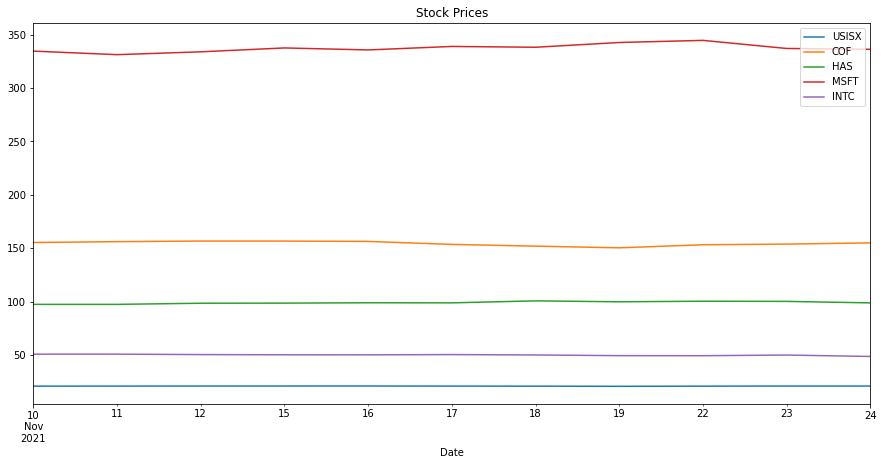

In [7]:
# Plot 4
USAA['Open'].plot(label = "USISX", figsize = (15,7))
CapitalOne['Open'].plot(label = 'COF')
HASBRO['Open'].plot(label = "HAS")
Microsoft['Open'].plot(label = 'MSFT')
Intel['Open'].plot(label = 'INTC')

plt.title('Stock Prices')
plt.legend()

Prices seem steady with no major crashes or increases.

Earnings per share (EPS) is a company's net profit divided by the number of common shares it has outstanding. EPS indicates how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value. I will take a higehr EPS as a good sign.

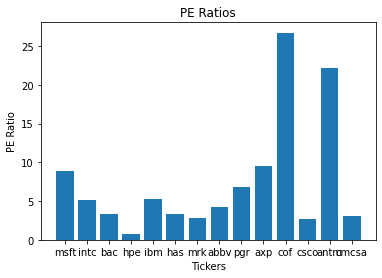

In [39]:
ticker_list = ["msft","intc","bac","hpe","ibm","has","mrk","abbv","pgr", "axp", "cof", "csco", 'antm', 'cmcsa']
y = [si.get_quote_table("msft")["EPS (TTM)"],
    si.get_quote_table("intc")["EPS (TTM)"],
    si.get_quote_table("bac")["EPS (TTM)"],
    si.get_quote_table("hpe")["EPS (TTM)"],
    si.get_quote_table("ibm")["EPS (TTM)"],
    si.get_quote_table("has")["EPS (TTM)"],
    si.get_quote_table("mrk")["EPS (TTM)"],
    si.get_quote_table("abbv")["EPS (TTM)"],
    si.get_quote_table("pgr")["EPS (TTM)"],
    si.get_quote_table("axp")["EPS (TTM)"],
    si.get_quote_table("cof")["EPS (TTM)"],
    si.get_quote_table("csco")["EPS (TTM)"],
    si.get_quote_table("antm")["EPS (TTM)"],
    si.get_quote_table("cmcsa")["EPS (TTM)"]]

plt.bar(ticker_list, y)
plt.xlabel("Tickers")
plt.ylabel("EPS")
plt.title("Earnings per Share")
plt.show()

It seems Microsoft has a good ratio, but overall Capital One and Anthem are far and away the best performers int his category.

Next I will look at Price per Earnings. This puts the EPS into a better context becuase it is simply the ratio Price of the Share over the EPS. In general, a high P/E suggests that investors are expecting higher earnings growth in the future compared to companies with a lower P/E. A low P/E can indicate either that a company may currently be undervalued or that the company is doing exceptionally well relative to its past trends. To play it safe, I will consider a higher PE ratio better than a lower one.

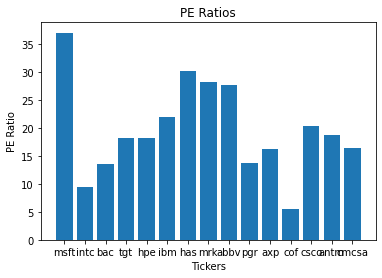

In [29]:
ticker_list = ["msft","intc","bac","hpe","ibm","has","mrk","abbv","pgr", "axp", "cof", "csco", 'antm', 'cmcsa']
y = [si.get_quote_table("msft")["Quote Price"]/si.get_quote_table("msft")["EPS (TTM)"],
    si.get_quote_table("intc")["Quote Price"]/si.get_quote_table("intc")["EPS (TTM)"],
    si.get_quote_table("bac")["Quote Price"]/si.get_quote_table("bac")["EPS (TTM)"],
    si.get_quote_table("hpe")["Quote Price"]/si.get_quote_table("hpe")["EPS (TTM)"],
    si.get_quote_table("ibm")["Quote Price"]/si.get_quote_table("ibm")["EPS (TTM)"],
    si.get_quote_table("has")["Quote Price"]/si.get_quote_table("has")["EPS (TTM)"],
    si.get_quote_table("mrk")["Quote Price"]/si.get_quote_table("mrk")["EPS (TTM)"],
    si.get_quote_table("abbv")["Quote Price"]/si.get_quote_table("abbv")["EPS (TTM)"],
    si.get_quote_table("pgr")["Quote Price"]/si.get_quote_table("pgr")["EPS (TTM)"],
    si.get_quote_table("axp")["Quote Price"]/si.get_quote_table("axp")["EPS (TTM)"],
    si.get_quote_table("cof")["Quote Price"]/si.get_quote_table("cof")["EPS (TTM)"],
    si.get_quote_table("csco")["Quote Price"]/si.get_quote_table("csco")["EPS (TTM)"],
    si.get_quote_table("antm")["Quote Price"]/si.get_quote_table("antm")["EPS (TTM)"],
    si.get_quote_table("cmcsa")["Quote Price"]/si.get_quote_table("cmcsa")["EPS (TTM)"]]

plt.bar(ticker_list, y)
plt.xlabel("Tickers")
plt.ylabel("PE")
plt.title("PE Ratio")
plt.show()

Surprisngly, Hasbro has a high ratio and unsurprisingly Microsoft has a higher one.  

Besides this, Merck and AbbVie are solid options.  

Finally, let's look at Beta. Beta is a measurement of how reactive a stock is, compared to the overall market, generally defined as the S&P 500. A beta of 1 indicates that a stock tends to move in line with the S&P 500 -- that is, a 5% upward move in the index should produce roughly the same move in the stock. I will chose the lowest Beta to try to acheive a consistent growth.

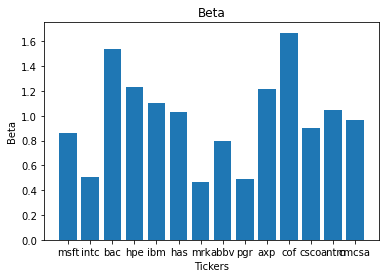

In [42]:
ticker_list = ["msft","intc","bac","hpe","ibm","has","mrk","abbv","pgr", "axp", "cof", "csco", 'antm', 'cmcsa']
y = [si.get_quote_table("msft")["Beta (5Y Monthly)"],
    si.get_quote_table("intc")["Beta (5Y Monthly)"],
    si.get_quote_table("bac")["Beta (5Y Monthly)"],
    si.get_quote_table("hpe")["Beta (5Y Monthly)"],
    si.get_quote_table("ibm")["Beta (5Y Monthly)"],
    si.get_quote_table("has")["Beta (5Y Monthly)"],
    si.get_quote_table("mrk")["Beta (5Y Monthly)"],
    si.get_quote_table("abbv")["Beta (5Y Monthly)"],
    si.get_quote_table("pgr")["Beta (5Y Monthly)"],
    si.get_quote_table("axp")["Beta (5Y Monthly)"],
    si.get_quote_table("cof")["Beta (5Y Monthly)"],
    si.get_quote_table("csco")["Beta (5Y Monthly)"],
    si.get_quote_table("antm")["Beta (5Y Monthly)"],
    si.get_quote_table("cmcsa")["Beta (5Y Monthly)"]]

plt.bar(ticker_list, y)
plt.xlabel("Tickers")
plt.ylabel("Beta")
plt.title("Beta")
plt.show()

Here is seems like AbbVie and Merck are some of the companies least likely to be volitile. This, combined with its solid PE ratios make them the top two candidates for me to choose. The final candidate will be Hasbro for similar reasons. All of the three companies showed a low EPS, but good PE ratios and Beta values, so I will choose them.